 En esta notebook analizaremos una base de datos que contiene información de venta de condensados de Walmart.

In [1]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

A continuación cargamos nuestro database de forma local:

In [2]:
from google.colab import files

uploaded = files.upload()


Saving walmart.csv to walmart.csv


Consultamos que tipo de base de dato tenemos:

In [3]:
type(uploaded)

dict

Levantamos nuestra base de datos como un dataframe:

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['walmart.csv']),sep=",")
df1 = pd.read_csv(io.BytesIO(uploaded['walmart.csv']),sep=",")
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Consultamos la cantidad de filas y columnas que contiene el dataframe:

In [5]:
df1.shape
print('El df tiene {} instancias y {} features'.format(df1.shape[0],df1.shape[1]))

El df tiene 6435 instancias y 8 features


Visualizamos el nombre de cada columna:

In [6]:
df1.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Consulto que tipo de dato es cada variable (columna)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Vemos si hay datos nulo en el dataframe:

In [8]:
df1.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Realizamos un descripción general de las columnas de la base de datos:


In [15]:
df1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Realizaremos un analisisde regresión

Creamos matrices con las columnas de Weekly_Sales y Fuel_Price

Extraemos las columnas y las ponemos en un nuevo dataframe

In [19]:
import scipy
import numpy as np

In [42]:
df_Fuel_Price = df1['Fuel_Price']
df_Temperature = df1['Temperature']

In [43]:
df_Fuel_Price

0       2.572
1       2.548
2       2.514
3       2.561
4       2.625
        ...  
6430    3.997
6431    3.985
6432    4.000
6433    3.969
6434    3.882
Name: Fuel_Price, Length: 6435, dtype: float64

In [44]:
df_Temperature

0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64

Transformamos los dataframe en matrices

In [45]:
x= np.array(df_Fuel_Price)
x

array([2.572, 2.548, 2.514, ..., 4.   , 3.969, 3.882])

In [46]:
y= np.array(df_Temperature)
y

array([42.31, 38.51, 39.93, ..., 54.47, 56.47, 58.85])

In [47]:
X = x.reshape((-1,1)) #pasamos los valores en forma de vector

In [48]:
X

array([[2.572],
       [2.548],
       [2.514],
       ...,
       [4.   ],
       [3.969],
       [3.882]])

Acontinuacin graficamos las dos variables y vemos si tienen algun tipo de relacion:

Se podria decir que tienen un relacion positiva.

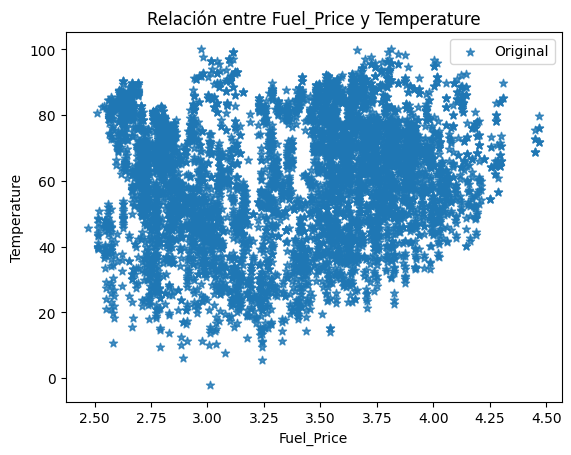

In [49]:
# Graficamos la relación
sns.regplot(x= X, y= y, fit_reg=False, label='Original',marker='*') #fit_reg = True
plt.xlabel('Fuel_Price')
plt.ylabel('Temperature')
plt.title('Relación entre Fuel_Price y Temperature')
plt.legend()
plt.show()

In [50]:
# Vector con unos: nos sirve para calcular el valor de la ordenada al origen
ones = np.ones(shape=(len(X),1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [51]:
# Agregamos el vector x
X = np.append(ones, X, axis= 1)
X

array([[1.   , 2.572],
       [1.   , 2.548],
       [1.   , 2.514],
       ...,
       [1.   , 4.   ],
       [1.   , 3.969],
       [1.   , 3.882]])

In [52]:
# Tamaño X
X.shape

(6435, 2)

In [53]:
# El vector x traspuesto
X.T

array([[1.   , 1.   , 1.   , ..., 1.   , 1.   , 1.   ],
       [2.572, 2.548, 2.514, ..., 4.   , 3.969, 3.882]])

In [54]:
# Utilizamos el metodo linalg para multiplicar los vectores:
X1 = np.linalg.inv(X.T @ X) # Calcular el inverso (multiplicativo) de una matriz, calculamos la inversa del producto matricial

In [55]:
X1

array([[ 0.00847638, -0.00247751],
       [-0.00247751,  0.00073766]])

In [56]:
# Estimaciones de betha:
betha = X1 @ (X.T @ y)

In [57]:
# b0 y b1 , el primer valor seria la ordenada al origen y la pendiente
betha.round(2) #round:redondea a dos decimales

array([41.1 ,  5.83])

El primer valor 41.1 es la interseccion de en el eje Y cuando X vale cero, y el otro valor es 5.83 este me indica la pendiente de la recta(indica el cambio en promedio de Y ante cada incremento de X en una unidad), como la pendiente es positiva me indica que al aumentar el valor de X tambien aumenta el valor de Y.

In [58]:
# Creamos nuestras predicciones
preds = X @ betha    #aqui obtengo los puntos que estan encima de la recta
preds

array([56.08112948, 55.94130909, 55.74323021, ..., 64.4004424 ,
       64.21984107, 63.71299217])

Graficamos la recta y vemos que efectivamente hay una relacion lineal positiva  entre las dos variables.

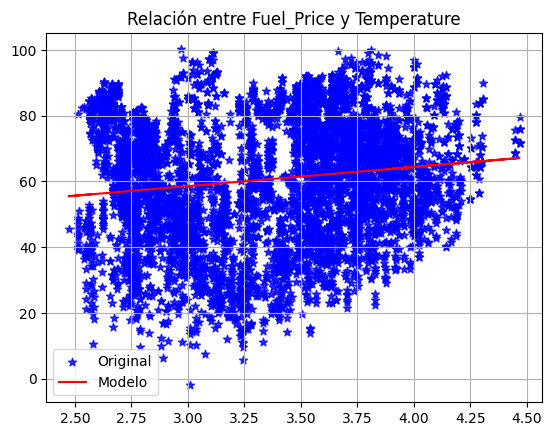

In [59]:
sns.regplot(x= x, y= y, fit_reg=False, marker='*' , color='blue', label= 'Original')
plt.plot(x, preds, label= 'Modelo', color='red')
plt.grid()
plt.legend()
plt.title('Relación entre Fuel_Price y Temperature')
plt.show()

In [60]:
# Creamos la SSR, SSD, SST
y_mean = np.mean(y)
SSR = (preds - y_mean)**2            #suma cuadrado regresion, se quiere que sea grande
SSD = (y - preds)**2                 #suma cuadrado de los errores, se quiere que sea pequeño
SST = (y - y_mean)**2                #suma cuadrado total

In [61]:
SSR_sum = sum(SSR) #sumatoria de esos valores
SSD_sum = sum(SSD)
SST_sum = sum(SST)

In [63]:
R2 = SSR_sum / SST_sum #suma cuadrado regresion divido suma cuadrado total
R2.round(3) #

0.021

El valor anterior 0.021 me indica que un 2.1% de la variabilidad de Y es explicada por la variabilidad de X.

Calculamos el coeficiente de correlacion y efectivamente vemos que da un valor positivo pequeño. Eso quiere decir que hay una relacion debil entre las dos variables.

In [64]:
R = np.sqrt(R2) # Vemos el coeficiente de correlación
R.round(3)

0.145